<a href="https://colab.research.google.com/github/vigneshramesh1/group32-capstone/blob/joseph_svm/svm_model/SVM_5gNIDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score

In [ ]:
PATH = '/content/drive/MyDrive/SER 517/Dataset/'
Dataset = pd.read_csv(PATH + 'dc_combined.csv')

In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215675 entries, 0 to 1215674
Data columns (total 98 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Seq                     1215675 non-null  int64  
 1   Dur                     1215675 non-null  float64
 2   RunTime                 1215675 non-null  float64
 3   Mean                    1215675 non-null  float64
 4   Sum                     1215675 non-null  float64
 5   Min                     1215675 non-null  float64
 6   Max                     1215675 non-null  float64
 7   sTos                    1215675 non-null  float64
 8   dTos                    1215675 non-null  float64
 9   sTtl                    1215675 non-null  float64
 10  dTtl                    1215675 non-null  float64
 11  sHops                   1215675 non-null  float64
 12  dHops                   1215675 non-null  float64
 13  TotPkts                 1215675 non-null  int64  
 14  Sr

In [ ]:
# Finding and removing columns with type "object"

def find_and_remove_columns_with_type_object(data):
    objectData = data.select_dtypes(include=[object])
    objectColumns=list(objectData.columns)
    print(objectColumns)
    new_data = data.drop(columns=objectColumns, inplace=False)
    return new_data

In [ ]:
X = find_and_remove_columns_with_type_object(Dataset)

['Label', 'Attack Type', 'Attack Tool']


In [ ]:
def remove_attack_and_seq_labels(data):
    X =  data.loc[:,~data.columns.str.startswith('Atk')]
    X =  X.loc[:,~X.columns.str.startswith('Attack')]
    X =  X.loc[:,~X.columns.str.startswith('Label_')]
    # X = X.drop(['Label', 'Seq'], axis=1)
    X = X.drop(['Seq'], axis=1)
    return X

In [ ]:
X = remove_attack_and_seq_labels(X)

In [ ]:
def label_encoder(data, column_name):
  Y = data[column_name]
  label_encoder = LabelEncoder()
  y_encoded = label_encoder.fit_transform(Y)
  return y_encoded

In [ ]:
Y = label_encoder(Dataset, 'Label')

In [ ]:
def mutual_info(X, Y):
  mutual_info_arr = mutual_info_classif(X, Y)
  series_info = pd.Series(mutual_info_arr)
  series_info.index = X.columns
  series_top = series_info.sort_values(ascending=False)[:20]
  return series_top

In [ ]:
result = mutual_info(X, Y)

<Axes: >

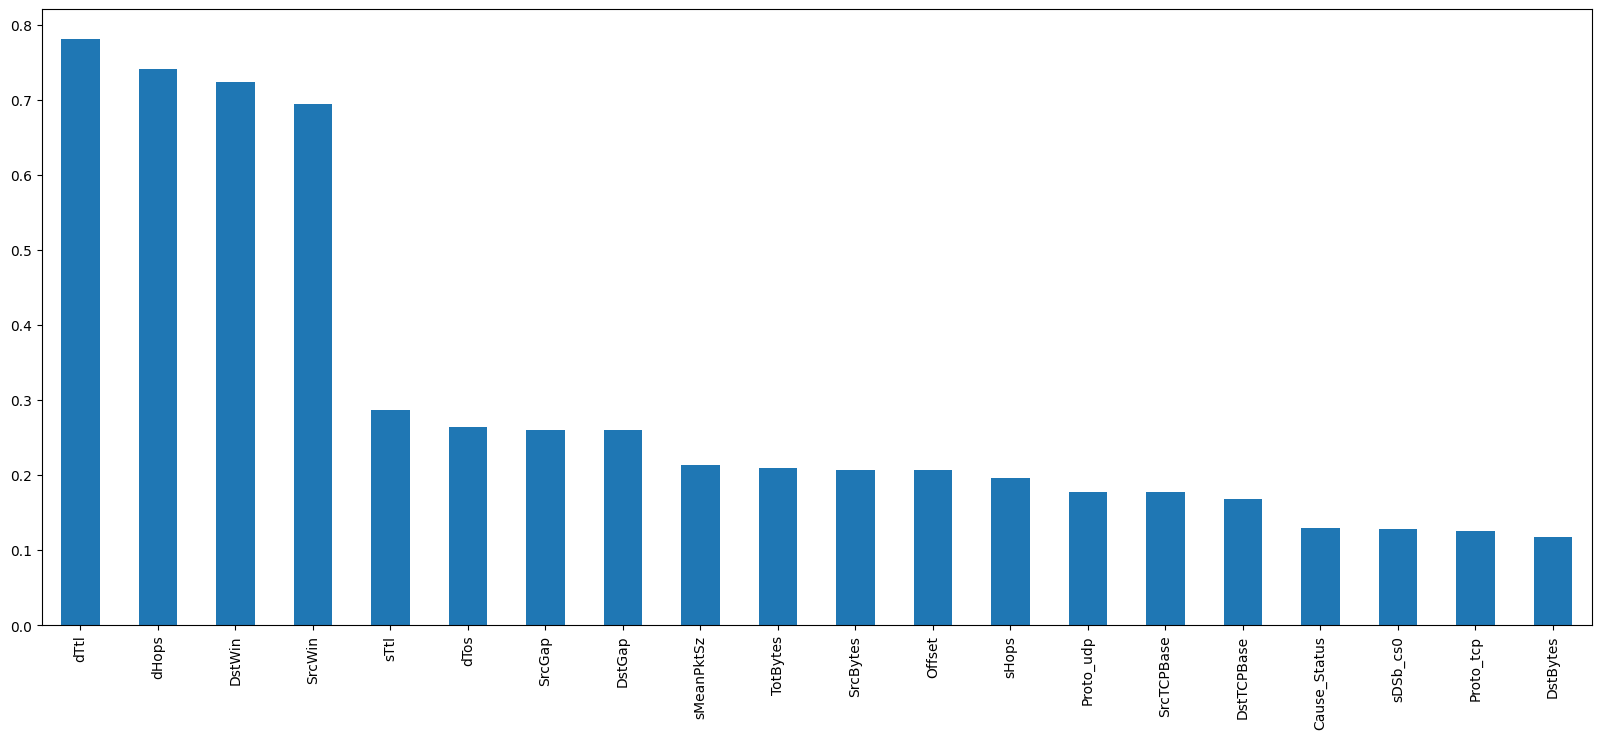

In [ ]:
result.plot.bar(figsize=(20,8))

In [ ]:
new_data = Dataset[result.keys()]

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215675 entries, 0 to 1215674
Data columns (total 20 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   dTtl          1215675 non-null  float64
 1   dHops         1215675 non-null  float64
 2   DstWin        1215675 non-null  float64
 3   SrcWin        1215675 non-null  float64
 4   sTtl          1215675 non-null  float64
 5   dTos          1215675 non-null  float64
 6   SrcGap        1215675 non-null  float64
 7   DstGap        1215675 non-null  float64
 8   sMeanPktSz    1215675 non-null  float64
 9   TotBytes      1215675 non-null  int64  
 10  SrcBytes      1215675 non-null  int64  
 11  Offset        1215675 non-null  int64  
 12  sHops         1215675 non-null  float64
 13  Proto_udp     1215675 non-null  int64  
 14  SrcTCPBase    1215675 non-null  float64
 15  DstTCPBase    1215675 non-null  float64
 16  Cause_Status  1215675 non-null  int64  
 17  sDSb_cs0      1215675 non-n

In [ ]:
#  Combining dataset

def concat_column_data(data, column_name):
  concat_data = pd.concat([data, Dataset[column_name]], axis = 1)
  return concat_data

In [ ]:
# SVC

data_svc = concat_column_data(new_data, "Label_Benign")

In [38]:
data_svc

,dTtl,dHops,DstWin,SrcWin,sTtl,dTos,SrcGap,DstGap,sMeanPktSz,TotBytes,...,Offset,sHops,Proto_udp,SrcTCPBase,DstTCPBase,Cause_Status,sDSb_cs0,Proto_tcp,DstBytes,Label_Benign
0,64.0,0.0,74432.548869,915681.012054,58.0,0.0,0.0,0.0,98.000000,98,...,128,6.0,0,2.044248e+09,2.145664e+09,0,1,0,0,1
1,64.0,0.0,74432.548869,915681.012054,58.0,0.0,0.0,0.0,98.000000,98,...,232,6.0,0,2.044248e+09,2.145664e+09,0,1,0,0,1
2,64.0,0.0,74432.548869,915681.012054,117.0,0.0,0.0,0.0,1245.979614,249093,...,336,11.0,1,2.044248e+09,2.145664e+09,0,1,0,4881,1
3,64.0,0.0,74432.548869,915681.012054,117.0,0.0,0.0,0.0,1326.656494,221712,...,440,11.0,1,2.044248e+09,2.145664e+09,0,1,0,5467,1
4,64.0,0.0,74432.548869,915681.012054,117.0,0.0,0.0,0.0,1351.583374,280216,...,544,11.0,1,2.044248e+09,2.145664e+09,0,1,0,4493,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215670,255.0,1.0,74432.928519,915740.586960,252.0,186.0,0.0,0.0,102.000000,200,...,190300,4.0,0,2.044248e+09,2.145664e+09,1,0,0,98,1
1215671,250.0,6.0,74432.907511,915737.284844,255.0,40.0,0.0,0.0,96.666664,3056,...,190392,1.0,0,2.044248e+09,2.145664e+09,1,0,0,2766,1
1215672,114.0,14.0,273.000000,213.000000,64.0,0.0,0.0,0.0,80.000000,252,...,190496,0.0,0,2.237373e+09,1.983280e+09,0,1,1,92,1
1215673,250.0,6.0,74432.907511,915737.284844,255.0,40.0,0.0,0.0,102.000000,596,...,190704,1.0,0,2.044248e+09,2.145664e+09,1,0,0,290,1


In [39]:
X = data_svc.iloc[:, :-1]  # All rows, all columns except the last one as features
y = data_svc['Label_Benign']  # Target variable

In [40]:
# Stratified sampling: 20,000 records out of 1.3 million
X_sample, _, y_sample, _ = train_test_split(X, y, stratify=y, train_size=250000 / 1215675, random_state=42)

# Combine back into a DataFrame
sampled_df = pd.concat([X_sample, y_sample], axis=1)

In [41]:
sampled_df

,dTtl,dHops,DstWin,SrcWin,sTtl,dTos,SrcGap,DstGap,sMeanPktSz,TotBytes,...,Offset,sHops,Proto_udp,SrcTCPBase,DstTCPBase,Cause_Status,sDSb_cs0,Proto_tcp,DstBytes,Label_Benign
186679,64.097845,2.185895,74432.543995,915680.244717,63.0,0.948916,0.019287,0.424036,42.0,126,...,11668788,1.0,1,2.044248e+09,2.145664e+09,1,1,0,0,0
901067,64.097845,2.185895,74432.543995,915680.244717,63.0,0.948916,0.019287,0.424036,42.0,42,...,10609260,1.0,1,2.044248e+09,2.145664e+09,1,1,0,0,0
962684,64.097845,2.185895,74432.543995,915680.244717,63.0,0.948916,0.019287,0.424036,42.0,42,...,15804292,1.0,1,2.044248e+09,2.145664e+09,1,1,0,0,0
1124138,59.000000,5.000000,64640.000000,64256.000000,63.0,0.000000,0.000000,0.000000,250.0,12713,...,8859252,1.0,0,3.365769e+09,1.119277e+09,0,1,1,11963,0
183904,64.097845,2.185895,74432.543995,915680.244717,63.0,0.948916,0.019287,0.424036,42.0,42,...,11432268,1.0,1,2.044248e+09,2.145664e+09,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627976,59.000000,5.000000,64768.000000,62848.000000,63.0,0.000000,0.000000,0.000000,66.0,132,...,13009336,1.0,0,1.896331e+09,2.573546e+09,1,1,1,66,0
798454,64.097845,2.185895,74432.543995,915680.244717,63.0,0.948916,0.019287,0.424036,42.0,84,...,1959524,1.0,1,2.044248e+09,2.145664e+09,0,1,0,0,0
105338,64.097845,2.185895,74432.543995,915680.244717,63.0,0.948916,0.019287,0.424036,42.0,42,...,4713568,1.0,1,2.044248e+09,2.145664e+09,0,1,0,0,0
40186,64.000000,0.000000,74432.548869,915681.012054,249.0,0.000000,0.000000,0.000000,74.0,74,...,816380,7.0,1,2.044248e+09,2.145664e+09,0,1,0,0,1


In [42]:
X = sampled_df.iloc[:, :-1]  # All rows, all columns except the last one as features
y = sampled_df['Label_Benign']  # Target variable

In [ ]:
# data_svc

In [ ]:
# X = data_svc.iloc[:, :-1]  # All rows, all columns except the last one as features
# y = data_svc['Label_Benign']  # Target variable

In [43]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# It's generally a good practice to scale your data for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Initialize and train the SVC model
svc_model = SVC(kernel='linear', random_state=42)  # You can choose different kernels like 'rbf', 'poly', etc.
svc_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [46]:
# Predictions
y_pred = svc_model.predict(X_test_scaled)

In [47]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.99562


In [48]:
# Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[30289    38]
 [  181 19492]]


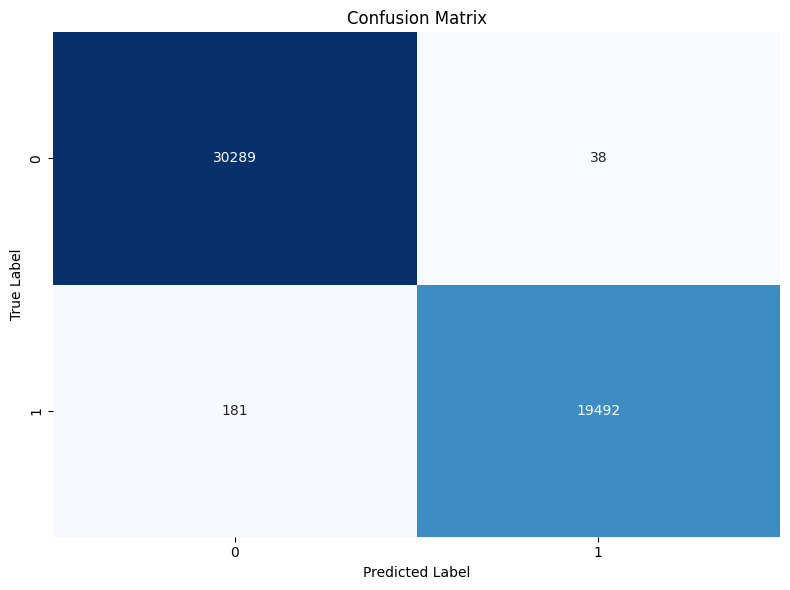

In [49]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Adjust layout to make room for the title
plt.tight_layout()

# Show plot
plt.show()

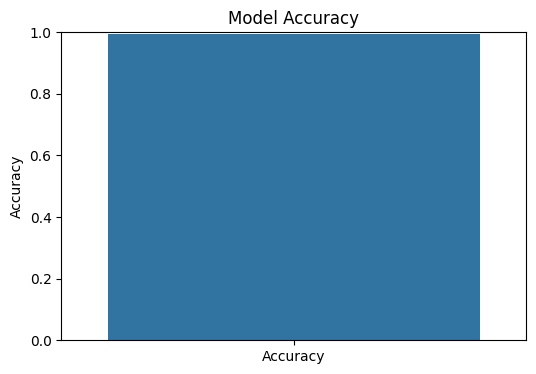

In [50]:
# Simple visualization of accuracy
plt.figure(figsize=(6, 4))
sns.barplot(x=['Accuracy'], y=[accuracy])
plt.ylim(0, 1)  # Assuming accuracy is a percentage
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()